<a href="https://colab.research.google.com/github/MRafliHaikal/UAS-Perbandingan-3-Algoritma/blob/main/Perbandingan_3_Algoritma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
from google.colab import files
uploaded = files.upload()

# Load CSV (pastikan nama file sesuai)
df = pd.read_csv("AmesHousing.csv")

# Tampilkan 5 baris pertama
df.head()


Saving AmesHousing.csv to AmesHousing.csv


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
print(df.columns.tolist())


['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'En

In [ ]:
# Hapus kolom dengan banyak missing value atau kurang relevan
columns_to_drop = [
    "Alley", "Lot Frontage", "Mas Vnr Type", "Mas Vnr Area",
    "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure",
    "BsmtFin Type 1", "BsmtFin Type 2", "Electrical",
    "Garage Type", "Garage Yr Blt", "Garage Finish",
    "Garage Qual", "Garage Cond"
]

df = df.drop(columns=columns_to_drop, errors="ignore")

# Hapus baris yang masih memiliki missing values
df = df.dropna()

# Konversi semua kolom kategorikal menjadi numerik (One-Hot Encoding)
df = pd.get_dummies(df)


In [ ]:
X = df.drop("SalePrice", axis=1)  # Semua kolom kecuali target
y = df["SalePrice"]               # Target: Harga Rumah


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Prediksi data test
y_pred = model_lr.predict(X_test)

# Hitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Hasil Evaluasi Linear Regression:")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R^2 Score: {r2:.4f}")


📊 Hasil Evaluasi Linear Regression:
RMSE (Root Mean Squared Error): 62020.28
R^2 Score: 0.4646


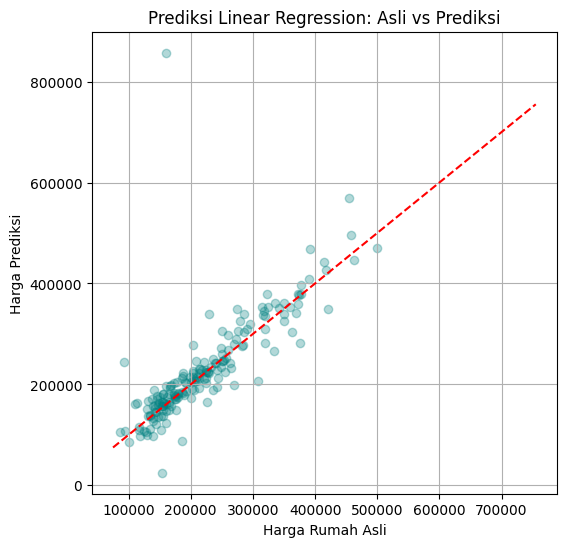

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # garis ideal
plt.xlabel("Harga Rumah Asli")
plt.ylabel("Harga Prediksi")
plt.title("Prediksi Linear Regression: Asli vs Prediksi")
plt.grid(True)
plt.show()


In [ ]:
results = pd.DataFrame({
    "Model": ["Linear Regression"],
    "RMSE": [rmse],
    "R2_Score": [r2]
})

results.to_csv("hasil_linear_regression.csv", index=False)


In [ ]:
# [ALGORITMA 2] - Tambahan import
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# [ALGORITMA 2] - Inisialisasi dan training model Random Forest
model_rf = RandomForestRegressor(
    n_estimators=100,       # jumlah pohon
    random_state=42,        # agar hasil konsisten
    n_jobs=-1               # gunakan semua CPU core
)
model_rf.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
# [ALGORITMA 2] - Prediksi dan evaluasi
y_pred_rf = model_rf.predict(X_test)

# Hitung metrik
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Tampilkan hasil
print("📊 [ALGORITMA 2] Hasil Evaluasi Random Forest:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R^2 Score: {r2_rf:.4f}")


📊 [ALGORITMA 2] Hasil Evaluasi Random Forest:
RMSE: 31104.29
R^2 Score: 0.8653


In [ ]:
# [ALGORITMA 2] - Tambahkan hasil Random Forest ke DataFrame
rf_result = pd.DataFrame([{
    "Model": "Random Forest",
    "RMSE": rmse_rf,
    "R2_Score": r2_rf
}])

results = pd.concat([results, rf_result], ignore_index=True)


In [ ]:
# [ALGORITMA 2] - Cek ulang evaluasi Random Forest
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prediksi ulang (jika belum)
y_pred_rf = model_rf.predict(X_test)

# Hitung metrik
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Tampilkan
print("📊 [Random Forest]")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")


📊 [Random Forest]
RMSE: 31104.29
R² Score: 0.8653


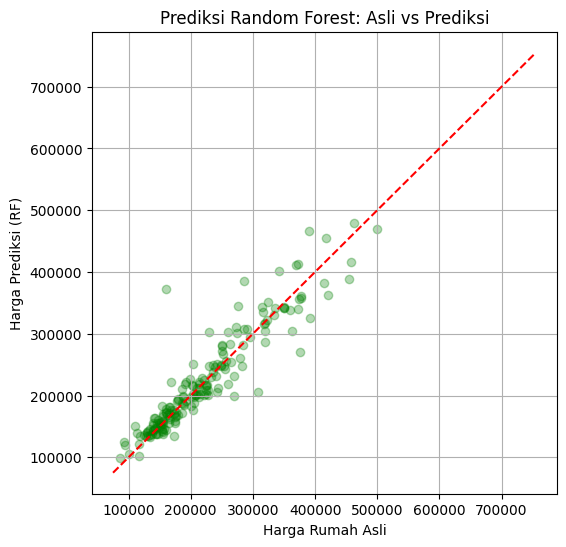

In [ ]:
# [ALGORITMA 2] - Visualisasi
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.3, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Harga Rumah Asli")
plt.ylabel("Harga Prediksi (RF)")
plt.title("Prediksi Random Forest: Asli vs Prediksi")
plt.grid(True)
plt.show()


In [ ]:
# [ALGORITMA 3] - Install dan import XGBoost
!pip install xgboost

import xgboost as xgb
from xgboost import XGBRegressor


In [ ]:
# [ALGORITMA 3] - Inisialisasi dan training model
model_xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)
model_xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# [ALGORITMA 3] - Prediksi dan evaluasi
y_pred_xgb = model_xgb.predict(X_test)

# Hitung metrik
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Tampilkan hasil
print("📊 [ALGORITMA 3] Hasil Evaluasi XGBoost:")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R^2 Score: {r2_xgb:.4f}")


📊 [ALGORITMA 3] Hasil Evaluasi XGBoost:
RMSE: 24969.86
R^2 Score: 0.9132


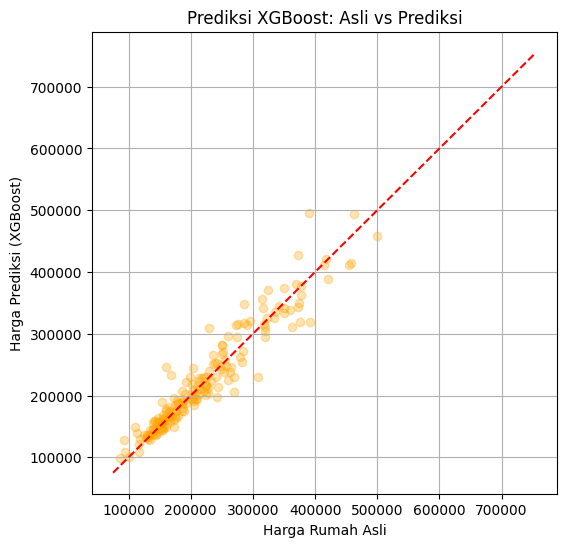

In [ ]:
# [ALGORITMA 3] - Visualisasi
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.3, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Harga Rumah Asli")
plt.ylabel("Harga Prediksi (XGBoost)")
plt.title("Prediksi XGBoost: Asli vs Prediksi")
plt.grid(True)
plt.show()


In [ ]:
# [ALGORITMA 3] - Tambahkan hasil XGBoost ke DataFrame dengan cara yang benar (pandas v2.0+)
xgb_result = pd.DataFrame([{
    "Model": "XGBoost",
    "RMSE": rmse_xgb,
    "R2_Score": r2_xgb
}])

results = pd.concat([results, xgb_result], ignore_index=True)


In [ ]:
rf_result = pd.DataFrame([{
    "Model": "Random Forest",
    "RMSE": rmse_rf,
    "R2_Score": r2_rf
}])

results = pd.concat([results, rf_result], ignore_index=True)
results.to_csv("hasil_akhir_semua_model.csv", index=False)
results


,Model,RMSE,R2_Score
0,Linear Regression,62020.278439,0.464646
1,XGBoost,24969.862154,0.913223
2,Random Forest,31104.290606,0.865348
3,Random Forest,31104.290606,0.865348


from matplotlib import pyplot as plt
results['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results['R2_Score'].plot(kind='hist', bins=20, title='R2_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
results.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results.plot(kind='scatter', x='RMSE', y='R2_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results['R2_Score'].plot(kind='line', figsize=(8, 4), title='R2_Score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results, x='RMSE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results, x='R2_Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)